### *Import valuable libraries and read into the files*

In [1]:
 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
fert = pd.read_csv('../data/gapminder_total_fertility.csv',index_col = 0)
life = pd.read_excel('../data/gapminder_lifeexpectancy.xlsx',index_col = 0)

## *Getting Tidy data*

 ### *Check whether the tables have the same size*

In [2]:
fert.shape == life.shape

False

In [3]:
life.shape

(260, 217)

In [4]:
fert.shape

(260, 216)

#### *No,they haven't.* 
*Same number of rows but different number of columns*

### *Check columns index of tables*

In [5]:
fert.columns

Index(['1800', '1801', '1802', '1803', '1804', '1805', '1806', '1807', '1808',
       '1809',
       ...
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015'],
      dtype='object', length=216)

*the columns indexes are strings*

In [6]:
life.columns

Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
            ...
            2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', length=217)

*the columns indexes are integer*

#### *Formatting the fert columns index as integer*

In [7]:
fert.columns = fert.columns.astype(int)

In [8]:
fert.columns

Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
            ...
            2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
           dtype='int64', length=216)

### *Check row index of tables*

In [9]:
fert.index , life.index

(Index(['Abkhazia', 'Afghanistan', 'Akrotiri and Dhekelia', 'Albania',
        'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla',
        'Antigua and Barbuda',
        ...
        'Vietnam', 'Virgin Islands (U.S.)', 'North Yemen (former)',
        'South Yemen (former)', 'Yemen', 'Yugoslavia', 'Zambia', 'Zimbabwe',
        'Åland', 'Åland'],
       dtype='object', name='Total fertility rate', length=260),
 Index(['Abkhazia', 'Afghanistan', 'Akrotiri and Dhekelia', 'Albania',
        'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla',
        'Antigua and Barbuda',
        ...
        'Vietnam', 'Virgin Islands (U.S.)', 'North Yemen (former)',
        'South Yemen (former)', 'Yemen', 'Yugoslavia', 'Zambia', 'Zimbabwe',
        'Åland', 'South Sudan'],
       dtype='object', name='Life expectancy', length=260))

*Rename the row index of the tables*

In [10]:
life.index.name = 'country' 

In [11]:
fert.index.name = 'country'

In [12]:
fert.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
country,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,6.70,6.46,6.20,5.93,5.66,5.40,5.14,4.90,4.68,4.47
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.85,1.80,1.76,1.74,1.74,1.75,1.76,1.77,1.78,1.78
Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.58,2.66,2.73,2.78,2.82,2.83,2.82,2.80,2.76,2.71


### *Convert the tables into 'long format'*

#### *First, move the row index to a column*

In [13]:
fert.reset_index(inplace = True)
life.reset_index(inplace = True)

In [14]:
life.index.rename('index',inplace=True)

In [15]:
fert.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,6.70,6.46,6.20,5.93,5.66,5.40,5.14,4.90,4.68,4.47
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.85,1.80,1.76,1.74,1.74,1.75,1.76,1.77,1.78,1.78
4,Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.58,2.66,2.73,2.78,2.82,2.83,2.82,2.80,2.76,2.71


#### *From wide to long*

In [16]:
fert_melt = fert.melt(id_vars='country',var_name='year',\
                      value_name='fertility')
life_melt = life.melt(id_vars='country',var_name='year',\
                      value_name='life expectancy')
life_melt.head()

,country,year,life expectancy
0,Abkhazia,1800,NaN
1,Afghanistan,1800,28.21
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,35.40
4,Algeria,1800,28.82


#### *Merging the two dataframes*

In [17]:
fert_life = fert_melt.merge(life_melt,on=['country','year'])

In [18]:
fert_life.dropna(inplace=True)
fert_life.head()

,country,year,fertility,life expectancy
1,Afghanistan,1800,7.00,28.21
3,Albania,1800,4.60,35.40
4,Algeria,1800,6.99,28.82
7,Angola,1800,6.93,26.98
9,Antigua and Barbuda,1800,5.00,33.54


In [21]:
fert_life.rename(columns={'fertility':'fertility rate'},inplace=True)

In [24]:
fert_life.head()

,country,year,fertility rate,life expectancy
1,Afghanistan,1800,7.00,28.21
3,Albania,1800,4.60,35.40
4,Algeria,1800,6.99,28.82
7,Angola,1800,6.93,26.98
9,Antigua and Barbuda,1800,5.00,33.54


### *read a new data file and merge it with fertility*

In [25]:
population = pd.read_excel('../data/gapminder_population.xlsx',index_col=0)

In [26]:
population.index.rename('country',inplace= True)

In [27]:
population.reset_index('country',inplace=True)

#### *Convert the population table into 'long format'*

In [28]:
pop_melt = population.melt(id_vars='country',\
                           var_name='year',\
                           value_name='population')

#### * New population column, values in Million*

In [29]:
pop_melt['population (M)'] = pop_melt[['population']].apply(lambda x: x/1000000)

In [30]:
pop_melt_2 = pop_melt.copy()

In [31]:
pop_melt_2.head()
pop_melt_3 = pop_melt_2.copy()

#### *Dropping population column

In [32]:
pop_melt.pop('population')

0              NaN
1        3280000.0
2              NaN
3         410445.0
4        2503218.0
           ...    
22270          NaN
22271          NaN
22272          NaN
22273          NaN
22274          NaN
Name: population, Length: 22275, dtype: float64

#### *merging fert_melt and pop_melt*

In [33]:
pop_melt.head()

,country,year,population (M)
0,Abkhazia,1800,NaN
1,Afghanistan,1800,3.280000
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,0.410445
4,Algeria,1800,2.503218


In [34]:
fert_pop = fert_melt.merge(pop_melt,on=['country','year'])

In [35]:
fert_pop.dropna(inplace=True)
fert_pop.head()

,country,year,fertility,population (M)
1,Afghanistan,1800,7.00,3.280000
3,Albania,1800,4.60,0.410445
4,Algeria,1800,6.99,2.503218
7,Angola,1800,6.93,1.567028
9,Antigua and Barbuda,1800,5.00,0.037000


In [36]:
fert_pop.rename(columns={'fertility':'fertility rate'},inplace=True)

#### *Subsetting the 'merged' tables for drawing plots*

In [37]:
fert_life_GFS = fert_life[fert_life['country'].isin\
                          (['France','Germany','Sweden'])]

In [38]:
fert_pop_GFS = fert_pop[fert_pop['country'].isin\
                          (['France','Germany','Sweden'])]

In [39]:
fert_pop_GFS.head()

,country,year,fertility rate,population (M)
76,France,1800,4.41,29.355111
82,Germany,1800,5.40,22.886919
217,Sweden,1800,4.07,2.354189
335,France,1810,3.90,30.293172
341,Germany,1810,5.35,23.882461


### *Draw plots in Seaborn and save it as png*

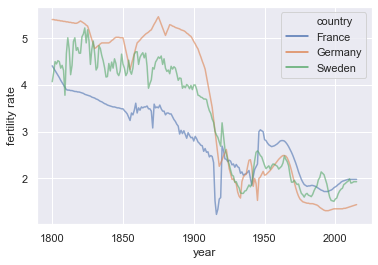

In [40]:
sns.lineplot(x = 'year', y='fertility rate',hue='country',\
             data=fert_life_GFS,alpha = 0.6)
plt.savefig('./figures/fertility_vs_year_lineplot.png',dpi = 150)

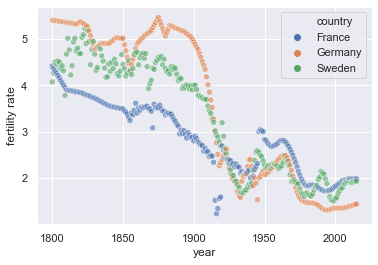

In [41]:
sns.scatterplot(x = 'year', y='fertility rate',hue='country',\
             data=fert_life_GFS,alpha = 0.6)
plt.savefig('./figures/fertility_vs_year_scatterplot.png',dpi = 150)

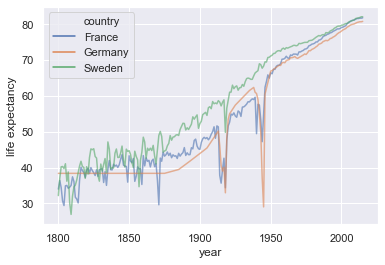

In [42]:
sns.lineplot(x = 'year', y='life expectancy',hue='country',\
             data=fert_life_GFS,alpha = 0.6)

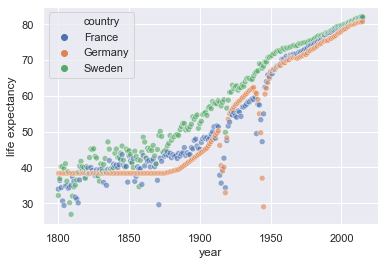

In [43]:
sns.scatterplot(x = 'year', y='life expectancy',hue='country',\
             data=fert_life_GFS,alpha = 0.6)
plt.savefig('./figures/life_expectancy_vs_year_scatterplot.png',dpi = 150)

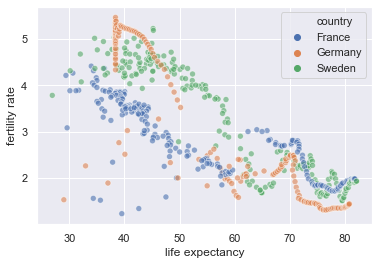

In [44]:
sns.scatterplot(x = 'life expectancy', y='fertility rate',hue='country',\
             data=fert_life_GFS,alpha = 0.6)
plt.savefig('./figures/lifeexpectancy_vs_fertility_scatterplot.png',dpi = 150)

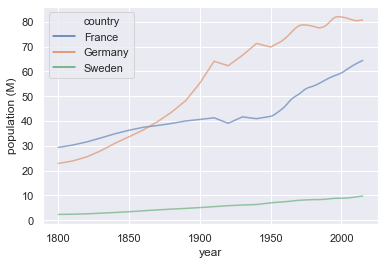

In [45]:
sns.lineplot(x = 'year', y='population (M)',hue='country',\
             data=fert_pop_GFS,alpha = 0.6)
plt.savefig('./figures/population_vs_year_lineplot.png',dpi = 150)

### *subsecting the fert_life_expect & fert_pop tables to the years >= 1960*

In [46]:
f_l_GFS_1960_on = fert_life_GFS.loc[fert_life_GFS.year >= 1960]
f_p_GFS_1960_on = fert_pop_GFS.loc[fert_pop_GFS.year >= 1960]

### *merging the tables*

In [47]:
fert_life_pop_GFS_1960_on = f_l_GFS_1960_on.merge(f_p_GFS_1960_on, on=['country','year','fertility rate'])

In [48]:
fert_life_pop_GFS_1960_on.head()

,country,year,fertility rate,life expectancy,population (M)
0,France,1960,2.77,70.49,45.865699
1,Germany,1960,2.41,69.26,73.179665
2,Sweden,1960,2.20,73.01,7.479602
3,France,1961,2.80,71.07,46.471083
4,Germany,1961,2.44,69.85,73.686490


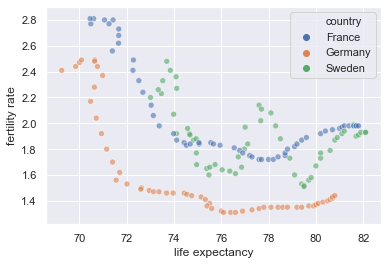

In [49]:
sns.scatterplot(x = 'life expectancy', y='fertility rate',hue='country',\
             data=fert_life_pop_GFS_1960_on,alpha = 0.6)
plt.savefig('./figures/fertility_vs_lifeexpectancy_scatterplot_1960.png',dpi = 150)

### *Draw frames in Matplotlib*

#### *Subsetting by country*

In [50]:
g1 = fert_life_pop_GFS_1960_on.groupby('country')
g_France = g1.get_group('France')
g_Germany = g1.get_group('Germany')
g_Sweden = g1.get_group('Sweden')
g_Germany.head()

,country,year,fertility rate,life expectancy,population (M)
1,Germany,1960,2.41,69.26,73.179665
4,Germany,1961,2.44,69.85,73.686490
7,Germany,1962,2.47,70.01,74.238494
10,Germany,1963,2.49,70.10,74.820389
13,Germany,1964,2.49,70.66,75.410766


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


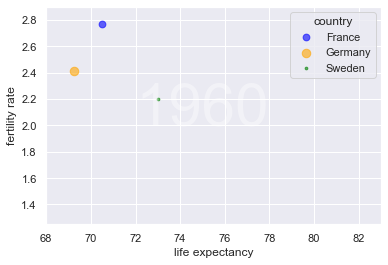

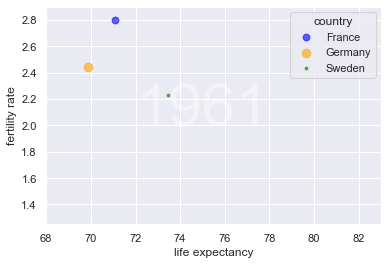

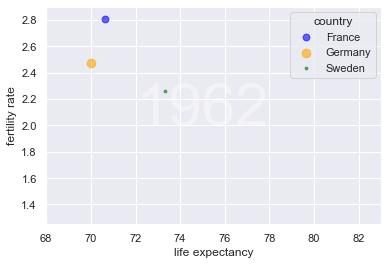

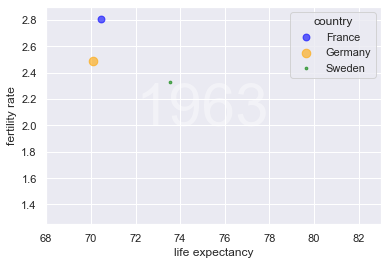

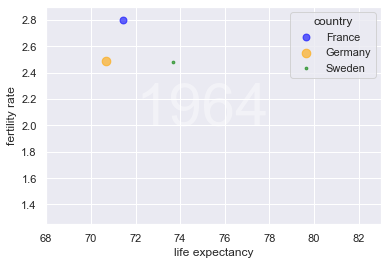

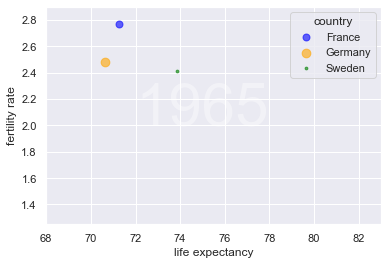

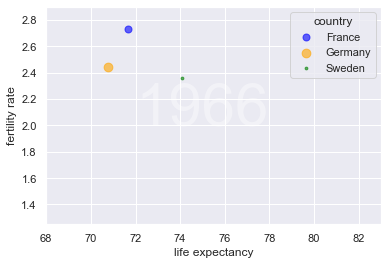

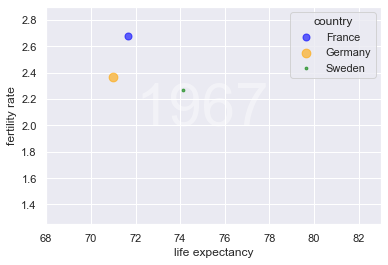

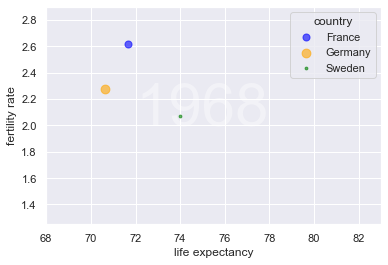

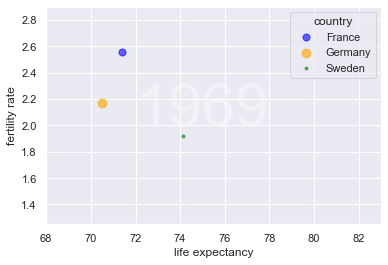

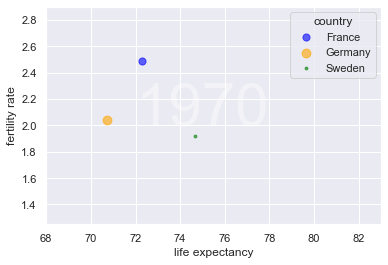

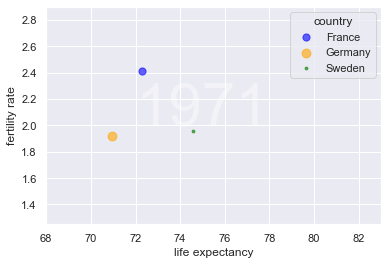

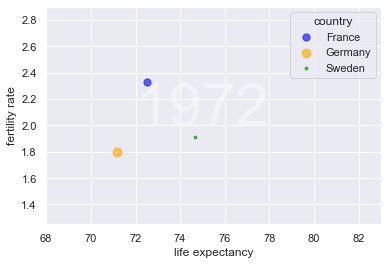

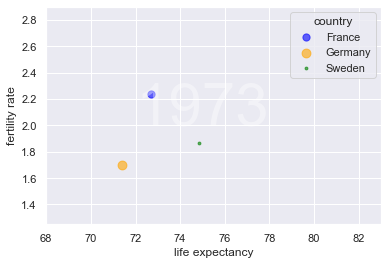

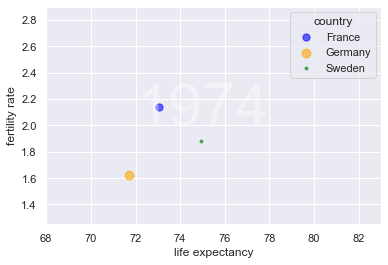

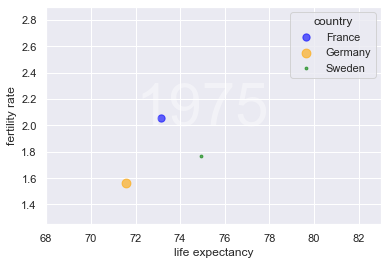

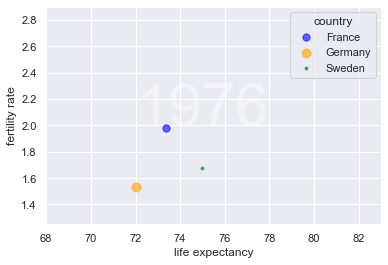

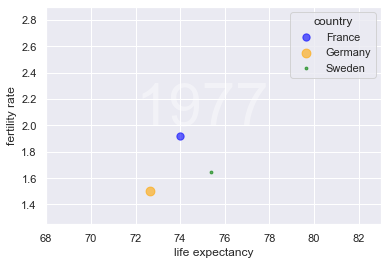

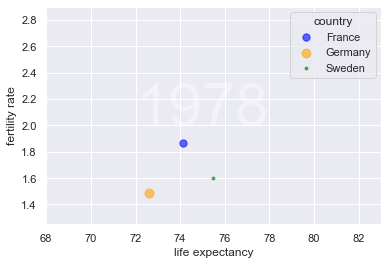

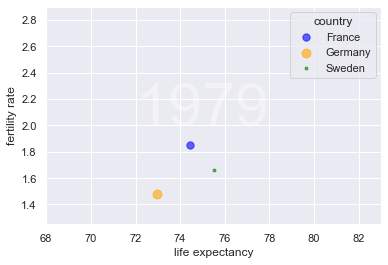

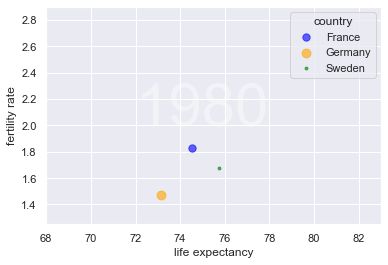

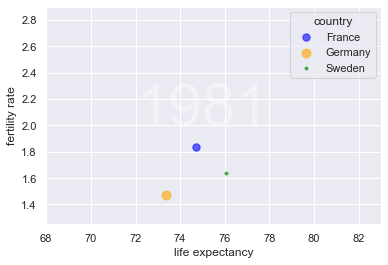

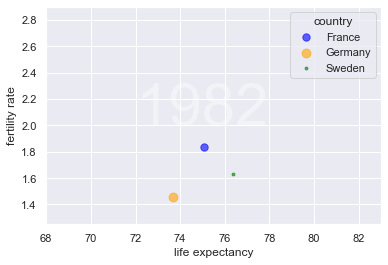

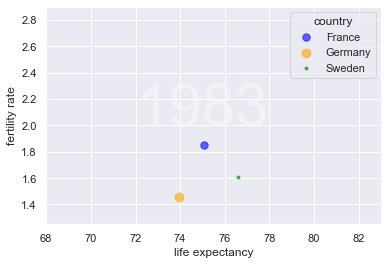

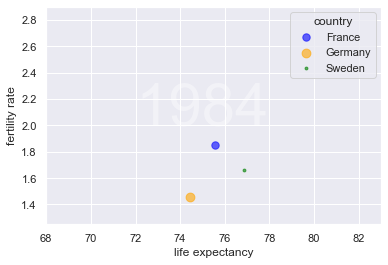

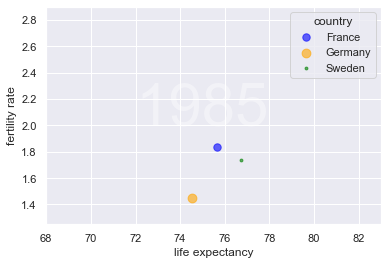

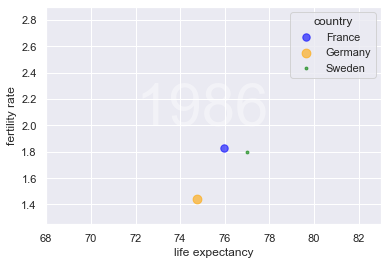

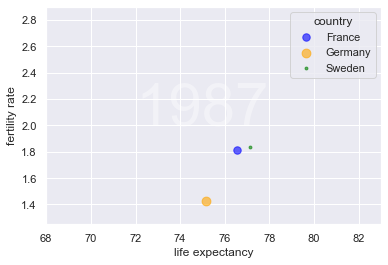

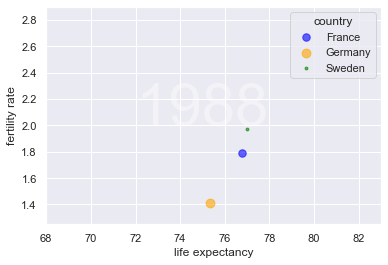

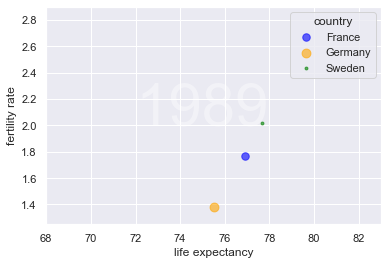

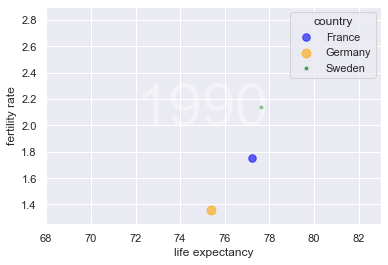

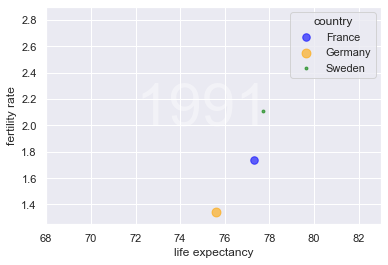

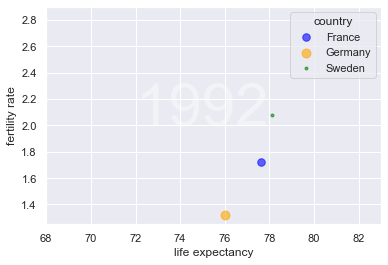

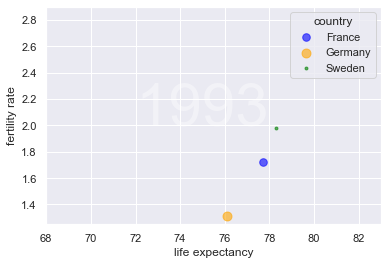

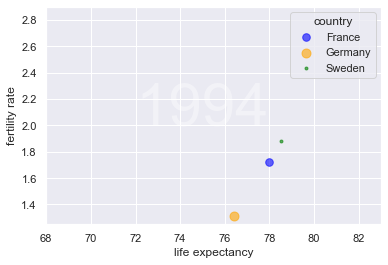

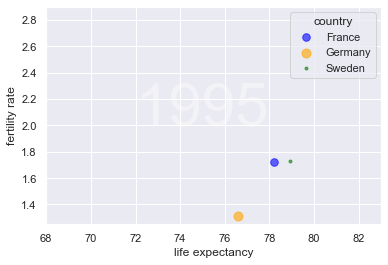

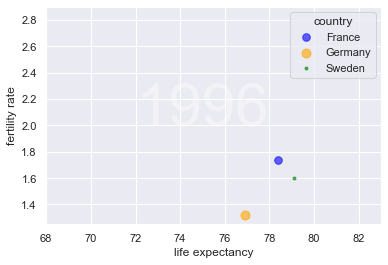

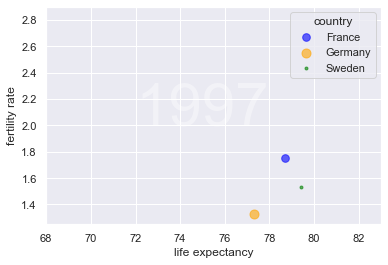

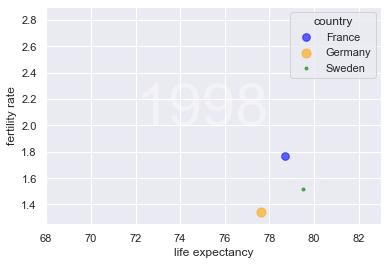

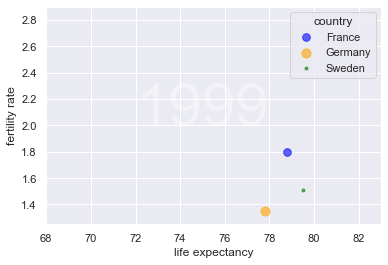

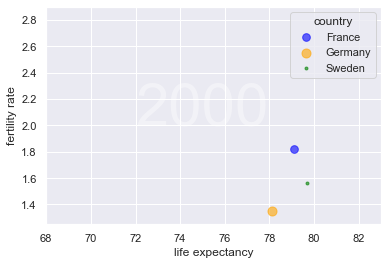

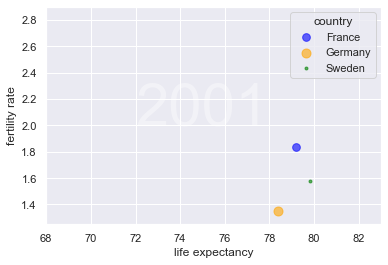

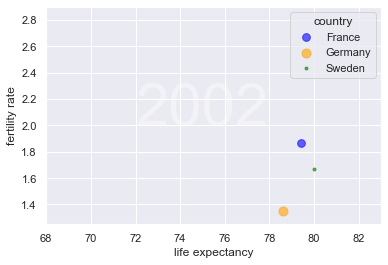

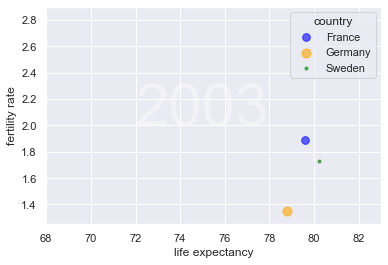

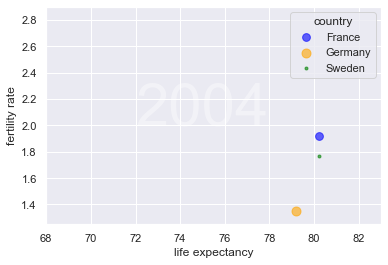

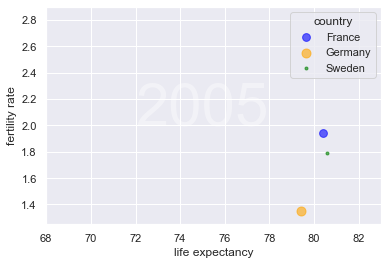

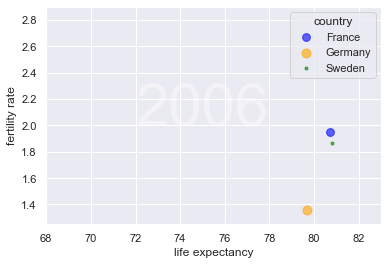

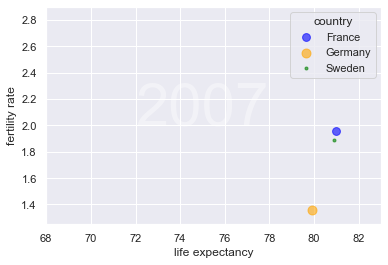

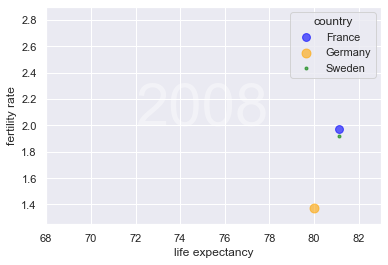

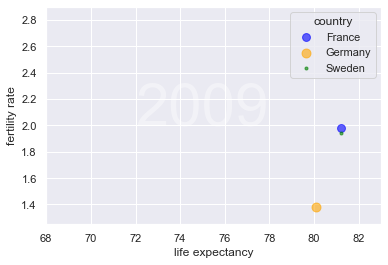

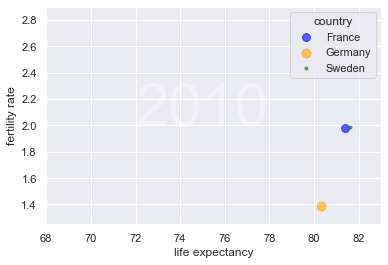

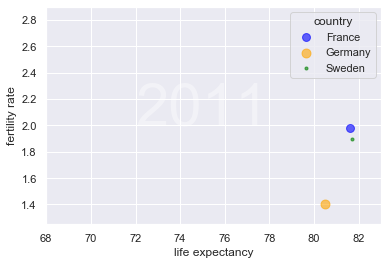

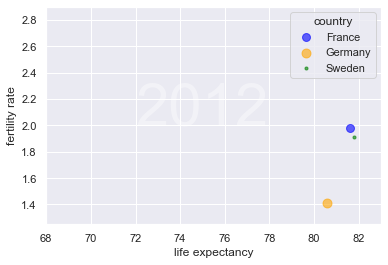

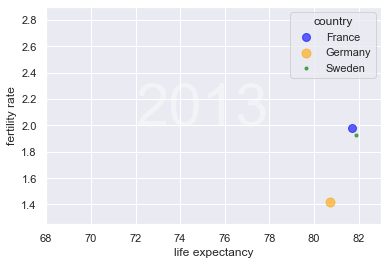

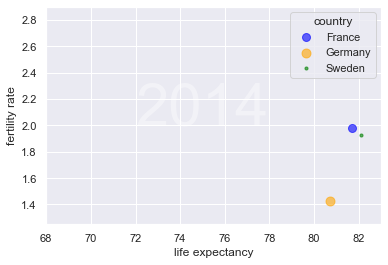

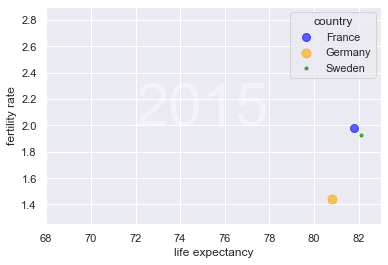

In [51]:
import numpy as np
# Importing the life expectancy, fertility 
# and population for each group as numpy array .
x_F = np.array(g_France['life expectancy'])
y_F = np.array(g_France['fertility rate'])
s_F = np.array(g_France['population (M)'])

x_G = np.array(g_Germany['life expectancy'])
y_G = np.array(g_Germany['fertility rate'])
s_G = np.array(g_Germany['population (M)'])

x_S = np.array(g_Sweden['life expectancy'])
y_S = np.array(g_Sweden['fertility rate'])
s_S = np.array(g_Sweden['population (M)'])

# Creating a list of string from the numpy array year
year = np.array(g_Germany['year'])
year_list = []
for num in year:
    string = str(num)
    year_list.append(string)
    
# Creating the frames
for i in np.arange(0,len(x_G)):
    
    fig, ax = plt.subplots()
    
    ax.scatter(x_F[i],y_F[i],color='blue',alpha = 0.6,\
               label = 'France',s = s_F[i]*1)
    
    ax.scatter(x_G[i],y_G[i],color='orange',alpha = 0.6,\
               label = 'Germany',s = s_G[i]*1)
    
    ax.scatter(x_S[i],y_S[i],color='green',alpha = 0.6,\
               label = 'Sweden',s = s_S[i]*1)
    
    plt.xlabel('life expectancy')
    plt.ylabel('fertility rate')
    ax.legend(title = 'country')
    plt.xlim((68, 83))
    plt.ylim((1.25,2.9))
    text = ax.text(72,2,year_list[i],color = 'white',fontsize=60)
    text.set_alpha(.4)
    plt.savefig('./figures/life_vs_fer_'+ year_list[i]+'.png',dpi=150)
    
#ax.scatter(x_G,y_G)

### *Import 'imageio' and prepare the gif*


In [52]:
import imageio

images = []
for i in np.arange(0,len(x_G)):
    filename = './figures/life_vs_fer_'+ year_list[i]+'.png'
    images.append(imageio.imread(filename))
imageio.mimsave('./figures/life_vs_fert.gif',images,format='GIF',fps=10)

In [53]:
year_list = []
def to_str(x):
    for num in x:
        string = str(num)
        year_list.append(string)
    return year_list
    

In [54]:
to_str(year)

['1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015']